##### Model Inferencing with Pre-trained Faster RCNN

In [37]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2,FasterRCNN_ResNet50_FPN_V2_Weights
import cv2 as cv
from matplotlib import pyplot as plt
from PIL import Image
from torchvision.transforms import functional as F
import numpy as np

In [38]:
def load_model():
    weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
    model = fasterrcnn_resnet50_fpn_v2(weights=weights,box_score_thres=0.7)
    model.eval()

    return model,weights.meta['categories']

In [39]:
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image_tensor = F.to_tensor(image)

    return image,image_tensor

In [40]:
def perfrom_detection(model,image_tensor):
    with torch.no_grad():
        prediction = model([image_tensor])
    print("Model Output")
    print(prediction)

    return prediction[0]

Class labels, Confidence scores and Bounding Box Coordinates

In [60]:
def visualize_detections(image, prediction, category_names):
    image_np = np.array(image)
    image_np = cv.cvtColor(image_np, cv.COLOR_RGB2BGR)

    boxes = prediction['boxes'].cpu().numpy().astype(np.int32)
    scores = prediction['scores'].cpu().numpy()
    labels = prediction['labels'].cpu().numpy()

    image_with_boxes = image_np.copy()
    color_map = {}

    for box, score, label in zip(boxes, scores, labels):
        if score < 0.90:   # optional: skip weak detections
            continue

        if label not in color_map:
            color_map[label] = (
                np.random.randint(0, 255),
                np.random.randint(0, 255),
                np.random.randint(0, 255)
            )
        color = color_map[label]

        # Draw bounding box
        cv.rectangle(
            image_with_boxes,
            (box[0], box[1]),
            (box[2], box[3]),
            color,
            2
        )

        # Label with score
        label_text = f"{category_names[label]}: {score:.2f}"
        text_size, baseline = cv.getTextSize(label_text, cv.FONT_HERSHEY_SIMPLEX, 0.5, 1)

        cv.rectangle(
            image_with_boxes,
            (box[0], box[1] - text_size[1] - 5),
            (box[0] + text_size[0], box[1]),
            color,
            -1
        )

        cv.putText(
            image_with_boxes,
            label_text,
            (box[0], box[1] - 5),
            cv.FONT_HERSHEY_SIMPLEX,
            0.5,
            (255, 255, 255),
            1,
            cv.LINE_AA
        )

    # convert back to RGB at the end
    image_with_boxes = cv.cvtColor(image_with_boxes, cv.COLOR_BGR2RGB)
    return image_with_boxes


In [61]:
def main(image_path):
    model,categories = load_model()
    print(f"Model loaded with {len(categories)} categories")

    image,image_tensor = preprocess_image(image_path)

    prediction = perfrom_detection(model,image_tensor)

    num_detections = len(prediction['boxes'])
    print(f'Detected {num_detections} objects')

    result_image = visualize_detections(image,prediction,categories)

    plt.figure(figsize=(12,8))
    plt.imshow(result_image)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


    print("\nDetection Details:")
    for i in range(num_detections):
        box = prediction['boxes'][i].cpu().numpy().astype(np.int32)
        score = prediction['scores'][i].cpu().numpy()
        label = prediction['labels'][i].cpu().numpy()
        print(f'Object {i+1}: {categories[label]}, Score: {score:.2f}, Box: {box}')

    return result_image

Model loaded with 91 categories
Model Output
[{'boxes': tensor([[2.8724e+00, 1.5377e+02, 5.4350e+02, 7.3801e+02],
        [6.5790e+00, 4.8317e+02, 1.7404e+02, 6.8065e+02],
        [4.6033e+01, 2.6622e+02, 8.0389e+01, 3.1729e+02],
        [4.4396e+02, 4.6625e+02, 5.5014e+02, 5.8363e+02],
        [4.8750e+02, 4.2637e+02, 6.0000e+02, 7.4174e+02],
        [1.1404e+02, 5.9817e+02, 2.1649e+02, 7.4609e+02],
        [3.9175e+01, 2.7413e+02, 5.8761e+01, 3.1622e+02],
        [0.0000e+00, 4.9042e+02, 4.1748e+01, 6.9200e+02],
        [1.6947e+02, 3.0538e+01, 3.8769e+02, 3.6517e+02],
        [3.9374e+02, 4.9525e+02, 4.4371e+02, 5.5387e+02],
        [2.1575e+02, 5.6308e+02, 3.9158e+02, 7.1382e+02],
        [4.8009e+02, 4.0996e+02, 5.0068e+02, 4.3621e+02],
        [4.3825e+02, 4.7518e+02, 4.7335e+02, 5.4891e+02],
        [4.9493e+02, 3.3887e+01, 6.0000e+02, 7.4070e+02],
        [1.5928e+02, 4.9727e+02, 2.2256e+02, 5.6571e+02],
        [2.3446e+01, 4.9312e+02, 6.1761e+01, 5.8206e+02],
        [1.3084e

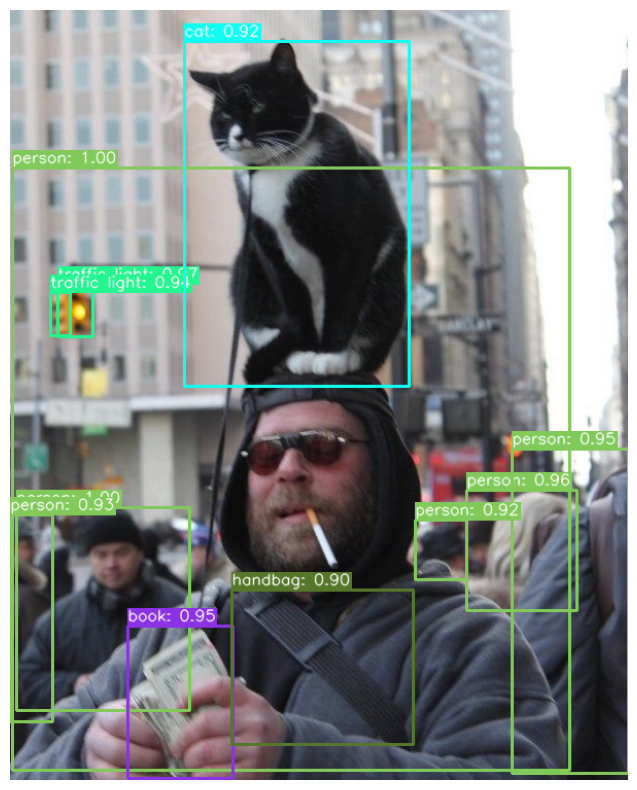


Detection Details:
Object 1: person, Score: 1.00, Box: [  2 153 543 738]
Object 2: person, Score: 1.00, Box: [  6 483 174 680]
Object 3: traffic light, Score: 0.97, Box: [ 46 266  80 317]
Object 4: person, Score: 0.96, Box: [443 466 550 583]
Object 5: person, Score: 0.95, Box: [487 426 600 741]
Object 6: book, Score: 0.95, Box: [114 598 216 746]
Object 7: traffic light, Score: 0.94, Box: [ 39 274  58 316]
Object 8: person, Score: 0.93, Box: [  0 490  41 691]
Object 9: cat, Score: 0.92, Box: [169  30 387 365]
Object 10: person, Score: 0.92, Box: [393 495 443 553]
Object 11: handbag, Score: 0.90, Box: [215 563 391 713]
Object 12: traffic light, Score: 0.86, Box: [480 409 500 436]
Object 13: person, Score: 0.84, Box: [438 475 473 548]
Object 14: person, Score: 0.81, Box: [494  33 600 740]
Object 15: person, Score: 0.76, Box: [159 497 222 565]
Object 16: person, Score: 0.72, Box: [ 23 493  61 582]
Object 17: person, Score: 0.69, Box: [130 493 194 566]
Object 18: toothbrush, Score: 0.64, B

In [62]:
image_path = "sample-image.jpg"
result = main(image_path)